In [4]:
from glob import glob
import torch
from os import listdir
from os.path import splitext
import logging, librosa
from torch.utils.data import Dataset
import numpy as np
import torch
from librosa import display
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as signal
from sklearn import preprocessing
from torch.utils.data import DataLoader, random_split
import torchvision.utils as vutils
import torchvision.transforms as transforms
import os

In [5]:
from dataset import BasicDataset

In [6]:
path="/Users/zombie/Downloads/LJSpeech-1.1/specs/"
revPath="/Users/zombie/Downloads/LJSpeech-1.1/reverbedWavs/"

In [11]:
t=BasicDataset(path)

In [13]:
dataloader = torch.utils.data.DataLoader(t, batch_size=8,shuffle=True, num_workers=0)

In [19]:
for i, j in enumerate(dataloader):
    print(type(j))
    break

<class 'dict'>


In [20]:
temp=j['reverbed']

In [21]:
temp.shape

torch.Size([8, 3, 256, 256])

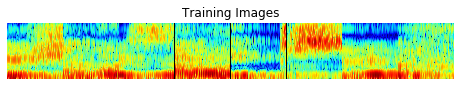

In [22]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(temp.to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [23]:
from unet import UNet

In [24]:
net=UNet(3, 3)

In [26]:
checkpoint=torch.load("../../Downloads/checkpoint.pt")
net.load_state_dict(checkpoint['modelStateDict'])

<All keys matched successfully>

In [14]:
# net.eval()

In [27]:
out=net(j['reverbed'])

In [31]:
temp=j['reverbed']

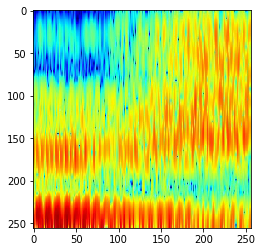

In [28]:
plt.imshow(np.transpose(vutils.make_grid(j['reverbed'][0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

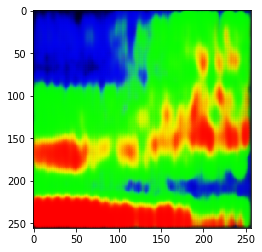

In [29]:
plt.imshow(np.transpose(vutils.make_grid(out[0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

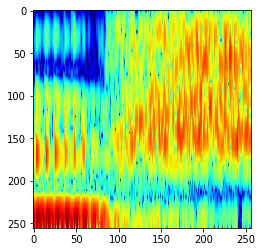

In [30]:
plt.imshow(np.transpose(vutils.make_grid(j['original'][0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [40]:
out[0].shape

torch.Size([3, 256, 256])

In [46]:
temp[2].min()

tensor(-1.)

In [48]:
out[2].min()

tensor(-0.9999, grad_fn=<MinBackward1>)

In [ ]:
def Channel3ToAudio

In [52]:
out[0]

tensor([[[-0.9668, -0.9743, -0.9800,  ..., -0.9599, -0.9571, -0.9578],
         [-0.9750, -0.9833, -0.9884,  ..., -0.9584, -0.9559, -0.9554],
         [-0.9807, -0.9887, -0.9926,  ..., -0.9566, -0.9527, -0.9540],
         ...,
         [-0.1425,  0.3996,  0.7885,  ..., -0.6428, -0.7106, -0.8182],
         [-0.5077, -0.0635,  0.4086,  ..., -0.7175, -0.7885, -0.8675],
         [-0.7734, -0.5851, -0.3075,  ..., -0.8205, -0.8665, -0.9049]],

        [[-0.9579, -0.9770, -0.9876,  ..., -0.7952, -0.7905, -0.8084],
         [-0.9781, -0.9908, -0.9962,  ..., -0.7234, -0.7322, -0.7807],
         [-0.9887, -0.9965, -0.9989,  ..., -0.5927, -0.6340, -0.7354],
         ...,
         [-0.9516, -0.9738, -0.9896,  ...,  0.0054, -0.2917, -0.5737],
         [-0.9376, -0.9574, -0.9792,  ..., -0.2757, -0.4921, -0.6800],
         [-0.9066, -0.9268, -0.9504,  ..., -0.5290, -0.6615, -0.7508]],

        [[-0.4353, -0.4822, -0.5439,  ..., -0.2165, -0.2769, -0.3186],
         [-0.4889, -0.5618, -0.6095,  ..., -0